Homework 08 - Galaxy Image

Name: Judit Bergfalk

## Question #1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from astropy.io import fits
with fits.open("sdss_images.fits") as f:
    u = f[1].data
    g = f[2].data
    r = f[3].data

sdss_images = fits.open('sdss_images.fits')
sdss_images.info()

Filename: sdss_images.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   ()      
  1  U             1 ImageHDU         8   (2048, 1489)   float32   
  2  G             1 ImageHDU         8   (2048, 1489)   float32   
  3  R             1 ImageHDU         8   (2048, 1489)   float32   


In [3]:
print('\033[1m' + "U FILTER" + '\033[0m')
print("Shape: {}.".format(u.shape))
print("Min flux: {}, Max flux: {}.".format(np.min(u), np.max(u)))
print("Mean flux: {}, Median flux: {}.".format(np.mean(u), np.median(u)))
print("Standard Deviation of flux: {}.".format(np.std(u)))
print("5th percentile of flux: {}, 95th percentile of flux: {}.".format(np.percentile(u,5), np.percentile(u,95)))

print('\033[1m' + "G FILTER" + '\033[0m')
print("Shape: {}.".format(g.shape))
print("Min flux: {}, Max flux: {}.".format(np.min(g), np.max(g)))
print("Mean flux: {}, Median flux: {}.".format(np.mean(g), np.median(g)))
print("Standard Deviation of flux: {}.".format(np.std(g)))
print("5th percentile of flux: {}, 95th percentile of flux: {}.".format(np.percentile(g,5), np.percentile(g,95)))

print('\033[1m' + "R FILTER" + '\033[0m')
print("Shape: {}.".format(r.shape))
print("Min flux: {}, Max flux: {}.".format(np.min(r), np.max(r)))
print("Mean flux: {}, Median flux: {}.".format(np.mean(r), np.median(r)))
print("Standard Deviation of flux: {}.".format(np.std(r)))
print("5th percentile of flux: {}, 95th percentile of flux: {}.".format(np.percentile(r,5), np.percentile(r,95)))

U FILTER
Shape: (1489, 2048).
Min flux: 1006.0, Max flux: 24659.0.
Mean flux: 1034.75341796875, Median flux: 1034.0.
Standard Deviation of flux: 49.03927993774414.
5th percentile of flux: 1025.0, 95th percentile of flux: 1044.0.
G FILTER
Shape: (1489, 2048).
Min flux: 1059.0, Max flux: 59519.0.
Mean flux: 1102.7596435546875, Median flux: 1100.0.
Standard Deviation of flux: 130.40280151367188.
5th percentile of flux: 1088.0, 95th percentile of flux: 1114.0.
R FILTER
Shape: (1489, 2048).
Min flux: 1134.0, Max flux: 47882.0.
Mean flux: 1168.0810546875, Median flux: 1166.0.
Standard Deviation of flux: 96.11371612548828.
5th percentile of flux: 1155.0, 95th percentile of flux: 1179.0.


## Question #2:

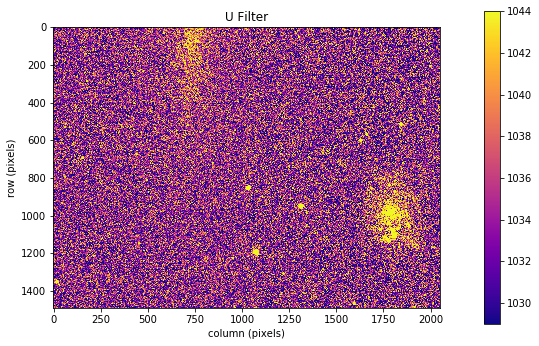

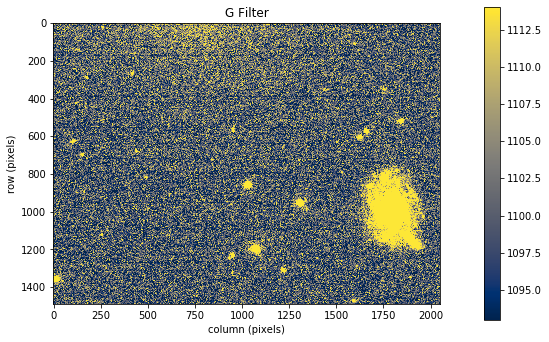

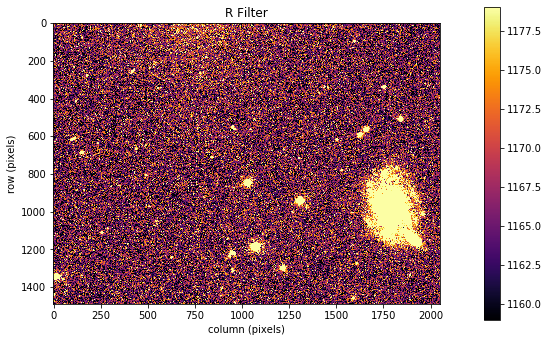

In [4]:
def displaySDSS(filter, minpercent=15, maxpercent=95, xlim=None, ylim=None, title=None, cmap=None):
    """
    Displays SDSS data of galaxy images taken through filters.
    ---------
    Arguments:
       filter:         [2D array] name of filter extracted from SDSS data
       minpercent:     [int/float] minimum percentile to compute using np.percentile, 
                                   values between 0 and 100 inclusive
       maxpercent:     [int/float] maximum percentile to compute using np.percentile, 
                                   values between 0 and 100 inclusive
       xlim:           [int/float] x-limit of the plot
       ylim:           [int/float] y-limit of the plot
       title:          [string /w quotation marks] name of plot title
       cmap:           colormap code
    ---------
    Return:
       Image of galaxy with a colorbar
    """
    plt.figure(figsize=(8.0,9.0))
    plt.imshow(filter, vmin=np.percentile(filter,minpercent), vmax=np.percentile(filter,maxpercent), cmap=cmap)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title(title)
    plt.xlabel("column (pixels)")
    plt.ylabel("row (pixels)")
    plt.colorbar(fraction=0.035, pad=0.1)
    plt.show()
    
displaySDSS(u, title="U Filter", cmap='plasma')
displaySDSS(g, title="G Filter", cmap='cividis')
displaySDSS(r, title="R Filter", cmap='inferno')

## Question #3:

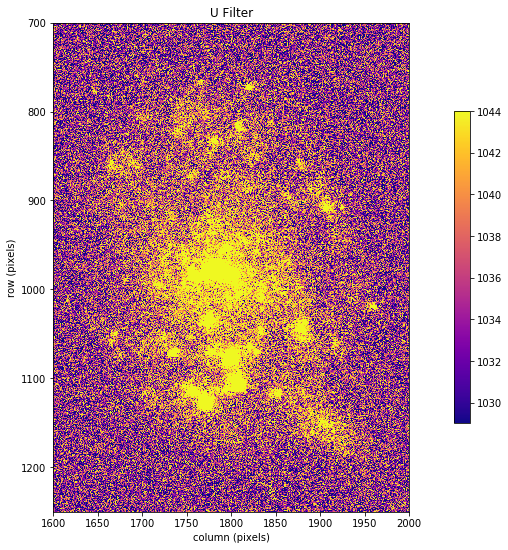

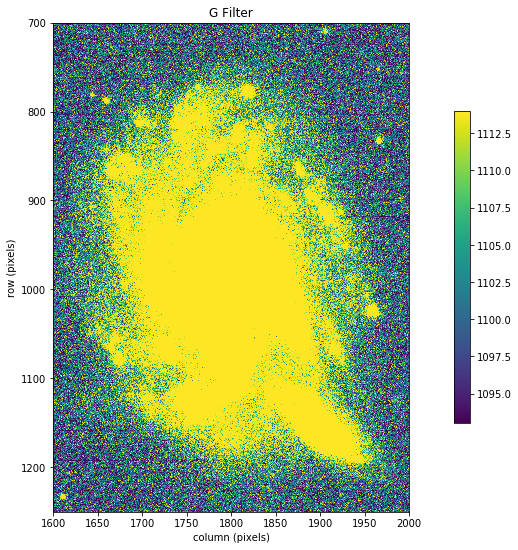

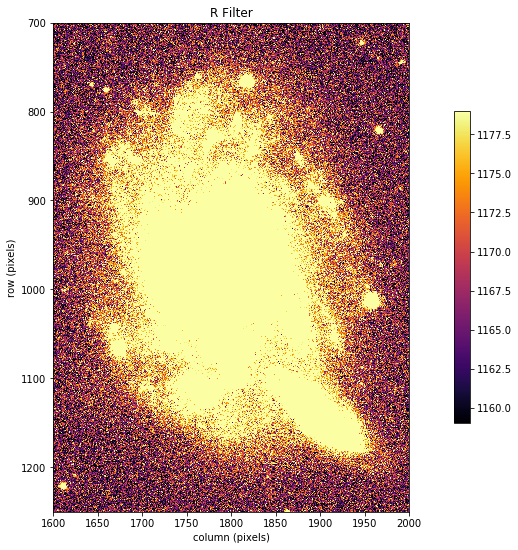

In [5]:
xlim = (1600,2000)
ylim = (1250,700)
displaySDSS(u, xlim=xlim, ylim=ylim, title="U Filter", cmap="plasma")
displaySDSS(g, xlim=xlim, ylim=ylim, title="G Filter", cmap="viridis")
displaySDSS(r, xlim=xlim, ylim=ylim, title="R Filter", cmap="inferno")

## Question #4:

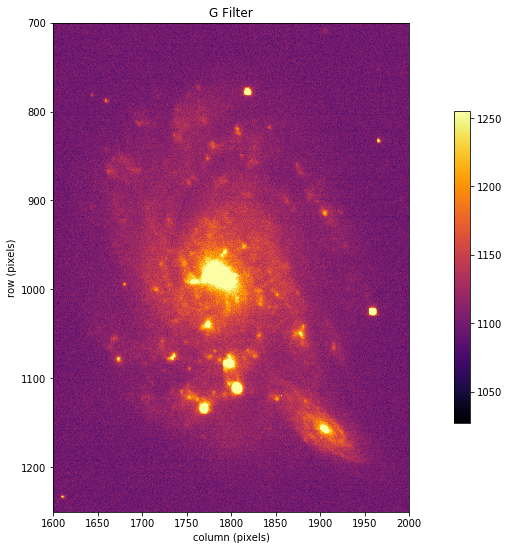

In [6]:
# This looks really cool!

displaySDSS(g, minpercent=99.0, maxpercent=99.0, xlim=xlim, ylim=ylim, title="G Filter", cmap="inferno")

In [7]:
def galaxyDiameterPixel(filter, percentile):
    """
    Calculates diameter of galaxy using an image.
    ---------
    Arguments:
       filter:      [2D array] name of filter extracted from SDSS data
       percentile:  [int/float] percentile of the image to compute using np.percentile, 
                                values between 0 and 100 inclusive
    -------
    Return:
       Diameter of galaxy in pixels
    """
    # create empty list
    diameter = []
    
    # calculate percentile
    flux = np.percentile(filter,percentile)
        
    # go through each row
    for column in filter:
        
        # start counting at zero
        count = 0
        
        # for each pixel in a column
        for pixel in column:
            
            # if the pixel is larger or equal to the flux given
            if pixel >= flux:
                            
                # then add 1 to the count
                count += 1
                
        # append the count to the array of diameters
        diameter.append(count)
    
    # print the maximum count of diameters
    print(np.max(diameter))

galaxyDiameterPixel(g, 80)

749


First, I'm calculating the diameter in pixels, using the values above 80% because that represents the bright spots. 
Counting the number of pixels in each column, adding it to a list and finding the columns with the maximum "bright" pixels seems like a good way to find the diameter of a galaxy. The reason I'm looking at the vertical diameter, rather than the horizontal diameter is that the galaxy might not be face-on (assuming), and the width seems shorter than the length.


In [8]:
def PixelToKpc(pixels,distanceMpc):
    """ 
    Converts pixels to kpc.
    --------
    Arguments:
       pixels       [int/float] number of pixels
       distance:    [int/float] distance of the galaxy in Mpc
    --------
    Returns:
       Length in kpc.
    """
    theta = pixels * 0.396 * (1/3600) * (np.pi/180)  # Each pixel of the SDSS camera covers an angle of 
                                                     # 0.396 arcseconds on the sky, 
                                                     # converted to degrees, then radians
    tantheta = np.tan(theta)
    distancekpc = distanceMpc * 1e3                  # converting Mpc to kpc
    diameter = distancekpc * tantheta
    return diameter

pixels = 749
print("The diameter of the galaxy is about {:.1f} kpc.".format(PixelToKpc(pixels,21)))

The diameter of the galaxy is about 30.2 kpc.


## Question #5:

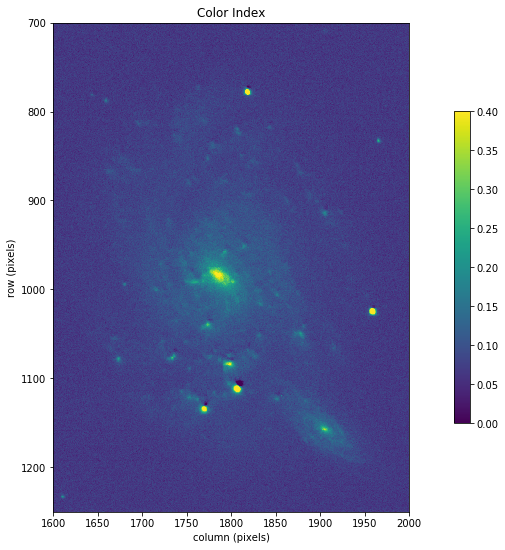

In [9]:
def displayColorindex(filter1, filter2, xlim=None, ylim=None, title=None, cmap=None):
    """
    Displays the color index using two different filters of the same image. 
    --------
    Arguments:
       filter1:       [2D array] name of filter extracted from SDSS data
       filter2:       [2D array] name of filter extracted from SDSS data
       xlim:          [int/float] x-limit of the plot
       ylim:          [int/float] y-limit of the plot
       title:         [string /w quotation marks] name of plot title
       cmap:          colormap code
    --------
    Returns:
       Plot of image, with a color index defined for every pixel
    """
    colorindex = 2.5 * np.log10(filter1/filter2)
    plt.figure(figsize=(8.0,9.0))
    plt.imshow(colorindex, vmin=0, vmax=0.4, cmap=cmap)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title(title)
    plt.xlabel("column (pixels)")
    plt.ylabel("row (pixels)")
    plt.colorbar(fraction=0.035, pad=0.1)
    plt.show()

displayColorindex(g, u, xlim=xlim, ylim=ylim, title="Color Index")

The outer part of the galaxy is the bluest, and the nucleus of the galaxy (bulge) is the reddest.

## Question #6: 

There is not likely a recent star formation in the nucleus of the galaxy because it's cooler (redder). Recent star formation could have occured in the outer regions (spiral arms) of the galaxy because that's a relatively hotter area, although it still has high color index. 